# Smoothen Stock Price
Write a function named `smoothen_price`. Given the historical stock price data (represented by a 1D numpy array) and a window size (an integer) as inputs, the function smoothens the stock price using a moving average filter. You can use the simple moving average filter. The function should plot the original stock price and smoothened stock price. Make sure your plot is clearly labeled. Do not use the built-in moving average filters. 

Test your function using the opening price of Tesla from "TSLA.csv" and window size 100. Here is the expected output:
![TSLA](assets/output.png)


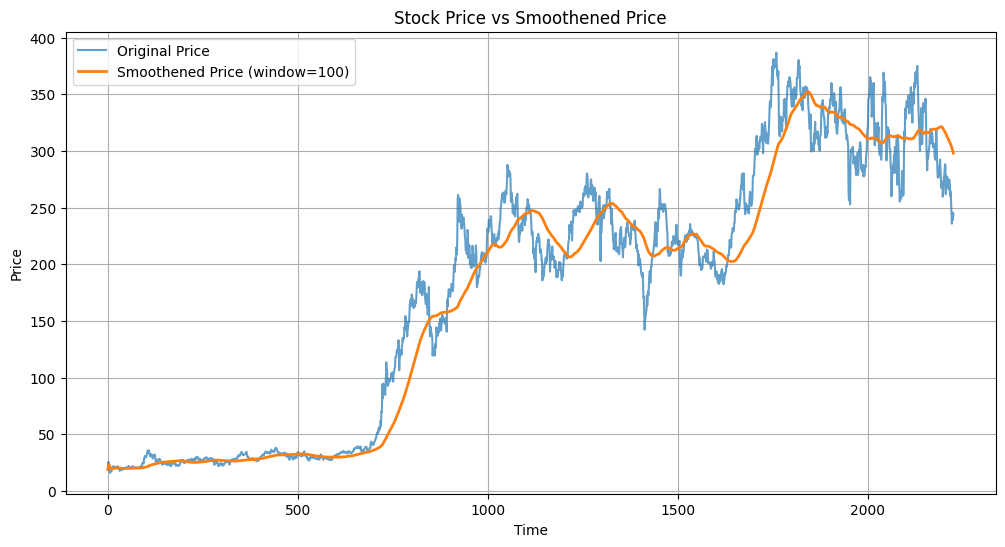

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def smoothen_price(prices: np.ndarray, window: int):
    """
    Smoothens the stock prices using a simple moving average.

    Parameters:
        prices (np.ndarray): 1D array of stock prices
        window (int): window size for the moving average
    """
    if window < 1:
        raise ValueError("Window size must be at least 1")
    n = len(prices)
    smooth_prices = np.zeros(n)
    
    # Compute moving average
    for i in range(n):
        start = max(0, i - window + 1)  # handle start of array
        smooth_prices[i] = np.mean(prices[start:i+1])
    
    # Plotting
    plt.figure(figsize=(12,6))
    plt.plot(prices, label="Original Price", alpha=0.7)
    plt.plot(smooth_prices, label=f"Smoothened Price (window={window})", linewidth=2)
    plt.title("Stock Price vs Smoothened Price")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage: Tesla TSLA opening prices
df = pd.read_csv("TSLA.csv")
tsla_open = df["Open"].values  # assuming column is named 'Open'
smoothen_price(tsla_open, window=100)


# Linear Regression

Write a program to accomplish the following goals:

- Load the "penguins.csv" data. 
- Remove all rows containing empty fields. 
- Fit a linear model to predict how body mass (dependent variable) of penguins is correlated to flipper length (independent variable).
- Print out the mean squared error and $R^2$ value.
Choose the appropriate plot to compare the actual body mass and the predicted body mass. Clearly label your plot.

Slope: 50.1533
Intercept: -5872.0927
Mean Squared Error: 153789.68
R^2 Value: 0.7621


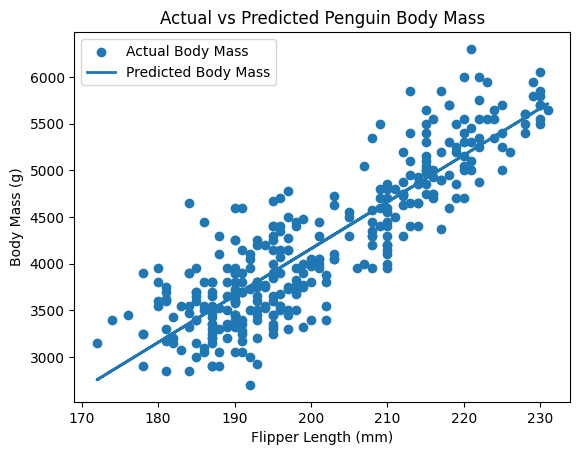

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("penguins.csv")

# 2. Remove rows with missing values
df = df.dropna()

# Extract variables
X = df['flipper_length_mm'].values
y = df['body_mass_g'].values

# Convert X into 2D matrix for matrix operations
X_mat = np.vstack([X, np.ones(len(X))]).T   # [x, 1]

# 3. Compute best-fit line using the normal equation
# beta = (X^T X)^(-1) X^T y
beta = np.linalg.inv(X_mat.T @ X_mat) @ X_mat.T @ y
slope, intercept = beta

# 4. Predictions
y_pred = slope * X + intercept

# 5. Compute metrics: MSE and R²
mse = np.mean((y - y_pred) ** 2)
r2 = 1 - np.sum((y - y_pred)**2) / np.sum((y - y.mean())**2)

print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Value: {r2:.4f}")

# 6. Plot actual vs predicted
plt.scatter(X, y, label="Actual Body Mass")
plt.plot(X, y_pred, label="Predicted Body Mass", linewidth=2)
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.title("Actual vs Predicted Penguin Body Mass")
plt.legend()
plt.show()


# Logistic Regression

We have discussed linear regression in class. In this problem, you will explore logistic regression. Specifically, you will preprocess the dataset using pandas for logistic regression. Different from linear regression, logistic regression considers binary dependent variables rather than continuous dependent variables. Logistic regression is widely-used to predict binary outcomes based on a set of features (independent variables). 

Write a program to accomplish the following:

- Load the "diabetes.csv" file using pandas.
- Extract the following columns as your independent variables: Glucose, BloodPressure, and BMI. Extract the top 75% rows as the features in training dataset named feature_train. For practice purpose, **do not use** the built-in dataset splitting function in this problem. In your future projects, you can use `train_test_split` from `sklearn.model_selection` to automatically split the dataset for you. 
- Extract the "Outcome" column as the dependent variable. Extract the top 75% rows as the labels in the training dataset, named outcome_train.  For practice purpose, do not use the built-in dataset splitting function in this problem.
- Keep the rest of data as your testing dataset. Let's name the features in testing dataset as `feature_test`
- Instantiate a logistic regression model named `logreg`. Fit the model using your training dataset. You can use the following code snippet:
    ```py
    logreg = LogisticRegression()
    logreg.fit(feature_train, outcome_train)
    ```

- Let's evaluate the quality of prediction. Test the learned model using `outcome_pred = logreg.predict(feature_test)`
Compare `outcome_pred` with the actual outcome in testing dataset, count the percentage of positive patients that are correctly predicted by your model. For practice purpose, do not use the built-in report/summary or confusion matrix for calculation. 
- Print out the false negative and false positive of your model. For practice purpose, do not use the built-in report/summary or confusion matrix for calculation. 

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np

# Load the dataset
df = pd.read_csv("diabetes.csv")

# Extract independent variables (features)
features = ["Glucose", "BloodPressure", "BMI"]
X = df[features].values

# Extract dependent variable (Outcome)
y = df["Outcome"].values

# Split into training and testing datasets manually
n_rows = len(df)
split_index = int(n_rows * 0.75)  # top 75% for training

feature_train = X[:split_index]
feature_test  = X[split_index:]

outcome_train = y[:split_index]
outcome_test  = y[split_index:]

# Instantiate and fit logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(feature_train, outcome_train)

# Make predictions
outcome_pred = logreg.predict(feature_test)

# Evaluate model: positive patients correctly predicted
true_positive = np.sum((outcome_test == 1) & (outcome_pred == 1))
total_positive = np.sum(outcome_test == 1)
if total_positive > 0:
    positive_accuracy = true_positive / total_positive * 100
else:
    positive_accuracy = 0

# Calculate false negatives and false positives
false_negative = np.sum((outcome_test == 1) & (outcome_pred == 0))
false_positive = np.sum((outcome_test == 0) & (outcome_pred == 1))

# Print results
print(f"Percentage of positive patients correctly predicted: {positive_accuracy:.2f}%")
print(f"False negatives: {false_negative}")
print(f"False positives: {false_positive}")

Percentage of positive patients correctly predicted: 51.43%
False negatives: 34
False positives: 11
